In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
plt.rc('figure', figsize=(10, 5))

In [28]:
#alterar eleitores por eleição

eleitores = 125764981

In [4]:
names = ['TRASH1', 'TRASH2', 'TRASH3', 'NR_TURNO', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH11',
'TRASH12', 'TRASH13', 'NM_URNA_CANDIDATO', 'DS_CARGO', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'SG_PARTIDO', 'TRASH21',
'TRASH22', 'TRASH23', 'TRASH24', 'QT_VOTOS_NOMINAIS']

In [5]:
df = pd.read_csv('votacao_candidato_munzona_2006_BR.txt', names = names, sep = ';', encoding='latin-1')

In [6]:
df.sample(1)

,TRASH1,TRASH2,TRASH3,NR_TURNO,TRASH4,TRASH5,TRASH6,TRASH7,TRASH8,TRASH9,TRASH10,TRASH11,TRASH12,TRASH13,NM_URNA_CANDIDATO,DS_CARGO,TRASH14,TRASH15,TRASH16,TRASH17,TRASH18,TRASH19,TRASH20,SG_PARTIDO,TRASH21,TRASH22,TRASH23,TRASH24,QT_VOTOS_NOMINAIS
25697,08/05/2017,16:18:45,2006,1,ELEIÇÕES 2006,BA,37737,37737,PARAMIRIM,111,1,17,1,LUCIANO CALDAS BIVAR,LUCIANO BIVAR,PRESIDENTE,12,APTO,2,DEFERIDO,4,NÃO ELEITO,17,PSL,PARTIDO SOCIAL LIBERAL,1,#NULO#,#NE#,14


In [7]:

droplist = ['TRASH1', 'TRASH2', 'TRASH3', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH11',
'TRASH12', 'TRASH13', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'TRASH21',
'TRASH22', 'TRASH23', 'TRASH24']




In [8]:
df = df.drop(droplist, axis = 1)

In [9]:
df.sample(2)

,NR_TURNO,NM_URNA_CANDIDATO,DS_CARGO,SG_PARTIDO,QT_VOTOS_NOMINAIS
44571,2,LULA,PRESIDENTE,PT,6112
9460,1,CRISTOVAM BUARQUE,PRESIDENTE,PDT,310


### Filtro por Cargo

In [29]:
dfpresidente = df[df.DS_CARGO == 'PRESIDENTE']

# Primeiro Turno

In [30]:
#Escolher Turno
dfpresidente1turno = dfpresidente[dfpresidente.NR_TURNO == 1]
#Grupar por
votostotais1turno = dfpresidente1turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais1turno['Porcentagem'] = votostotais1turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais1turno = votostotais1turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v1 = votostotais1turno.QT_VOTOS_NOMINAIS.sum()

In [31]:
#Criação de Outros e mostrando somente os 5 primeiros

outros1 = votostotais1turno.QT_VOTOS_NOMINAIS[5:100].sum()
outros1p = votostotais1turno.Porcentagem[5:100].sum()

votostotais1turno = votostotais1turno[0:5].append({'SG_PARTIDO' : 'Outros' , 'NM_URNA_CANDIDATO' : 'Outros', 'QT_VOTOS_NOMINAIS' : outros1, 'Porcentagem' : outros1p } , ignore_index=True)

votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,LULA,46662365,40.454785
1,PSDB,GERALDO ALCKMIN,39968369,34.651304
2,PSOL,HELOÍSA HELENA,6575393,5.700656
3,PDT,CRISTOVAM BUARQUE,2538844,2.201097
4,PRP,ANA MARIA RANGEL,126404,0.109588
5,Outros,Outros,125358,0.108681


([<matplotlib.patches.Wedge at 0x23076a5fa48>,
 [Text(-0.5532058634368368, -0.9507698315886469, 'Votos Totais'),
  Text(0.6034974512324464, 1.0372033678869064, 'Não Votaram')],
 [Text(-0.30174865278372914, -0.5186017263210801, '83.2%'),
  Text(0.3520401798855937, 0.6050352979340285, '16.8%')])

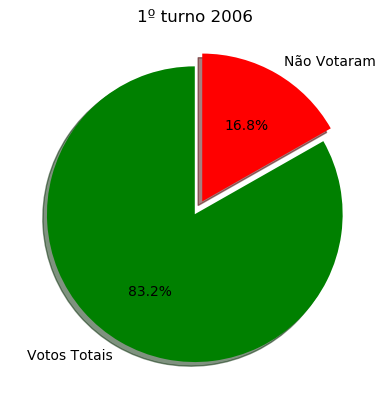

In [32]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = 'Votos Totais', 'Não Votaram'
sizes = [v1, (eleitores-v1)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('1º turno 2006')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)


([<matplotlib.patches.Wedge at 0x23077207b08>,
 [Text(-1.1988532092817874, 0.05244981024521547, 'LULA'),
  Text(1.033221583918618, -0.3774296736144396, 'GERALDO ALCKMIN'),
  Text(0.42616854058236525, 1.0140909106277882, 'HELOÍSA HELENA'),
  Text(0.17892103250813307, 1.7910854988319858, 'CRISTOVAM BUARQUE'),
  Text(0.02098085644393723, 1.6998705255586022, 'ANA MARIA RANGEL'),
  Text(0.006564495844339616, 1.599986533504051, 'Outros')],
 [Text(-0.6993310387477092, 0.030595722643042354, '48.6%'),
  Text(0.5635754094101552, -0.20587073106242157, '41.6%'),
  Text(0.23245556759038102, 0.5531404967060662, '6.8%'),
  Text(0.12922074570031833, 1.2935617491564342, '2.6%'),
  Text(0.014810016313367456, 1.1999086062766604, '0.1%'),
  Text(0.004513090892983486, 1.099990741784035, '0.1%')])

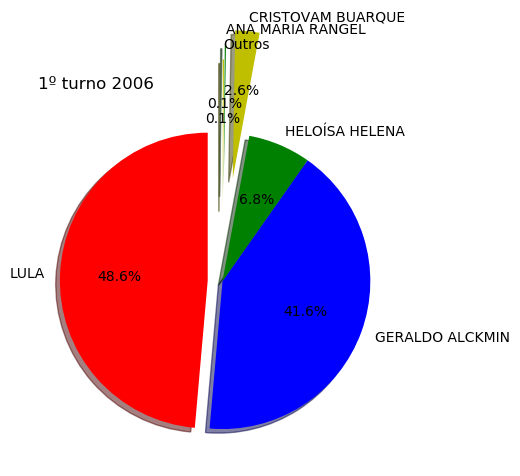

In [33]:
#Grafico de Pizza
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.1, 0.0, 0.0, 0.7, 0.6, 0.5)
colors = ('r', 'b', 'g', 'y', 'g', 'y')

plt.pyplot.title('1º turno 2006', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)


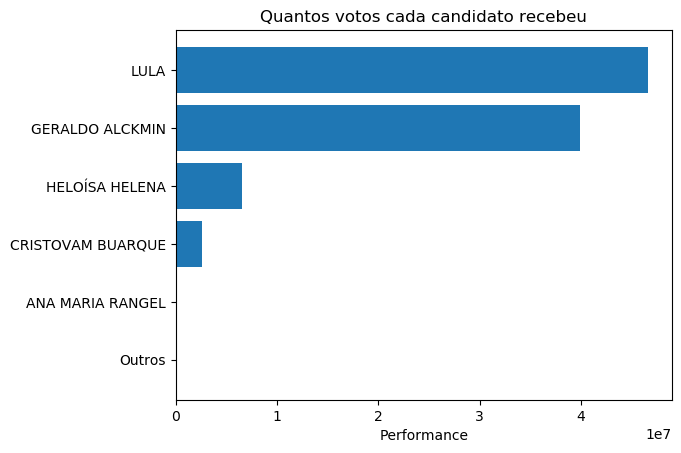

In [34]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

# Segundo Turno

In [35]:
#Escolher Turno
dfpresidente2turno = dfpresidente[dfpresidente.NR_TURNO == 2]
#Grupar por
votostotais2turno = dfpresidente2turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais2turno['Porcentagem'] = votostotais2turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais2turno = votostotais2turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v2 = votostotais2turno.QT_VOTOS_NOMINAIS.sum()

([<matplotlib.patches.Wedge at 0x23076ee8648>,
 [Text(-0.5573054698066569, -0.9483726131239671, 'Votos Totais'),
  Text(0.6079697002905892, 1.034588248303919, 'Não Votaram')],
 [Text(-0.30398480171272185, -0.5172941526130729, '83.1%'),
  Text(0.35464899183617693, 0.6035098115106193, '16.9%')])

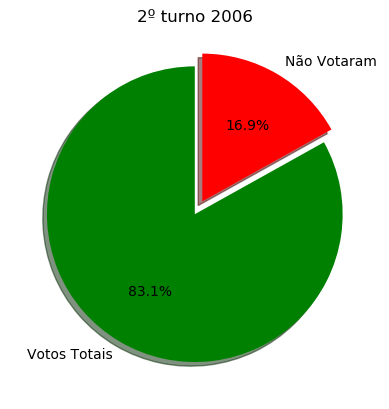

In [36]:
#Grafico de Pizza

labels = 'Votos Totais', 'Não Votaram'
sizes = [v2, (eleitores-v2)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('2º turno 2006')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)

([<matplotlib.patches.Wedge at 0x23076abb948>,
 [Text(-1.0369843249896893, -0.36696527046258565, 'LULA'),
  Text(1.1312555897802727, 0.40032585551134187, 'GERALDO ALCKMIN')],
 [Text(-0.5656278136307396, -0.20016287479777398, '60.8%'),
  Text(0.6598990940384923, 0.2335234157149494, '39.2%')])

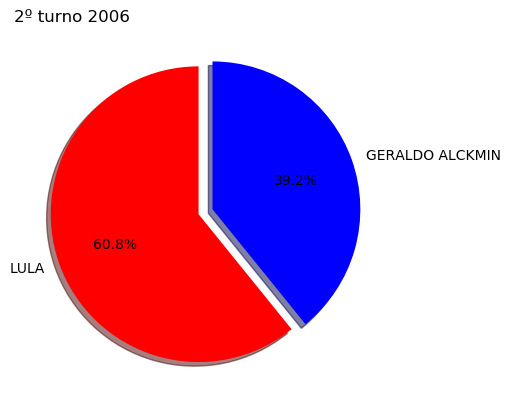

In [37]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1)
colors = ('r','b')

plt.pyplot.title('2º turno 2006', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

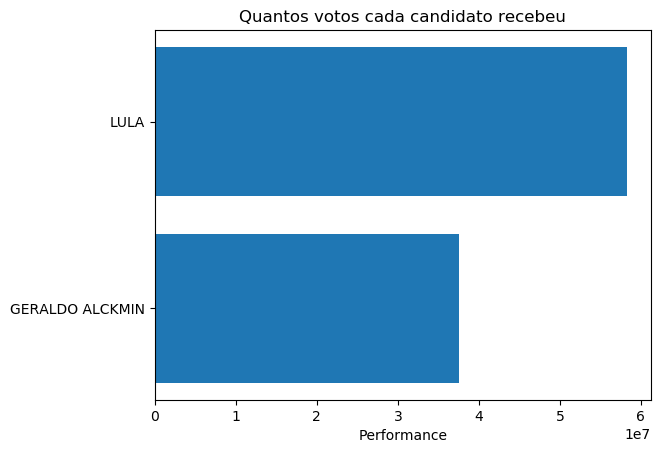

In [38]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

In [39]:
votostotais2turno = votostotais2turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v2), 
                                              'Porcentagem' : 100-votostotais2turno.Porcentagem.sum() } , ignore_index=True)
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,LULA,58295042,50.539946
1,PSDB,GERALDO ALCKMIN,37543178,32.548740
2,Não Votaram,Não Votaram,19506269,16.911314


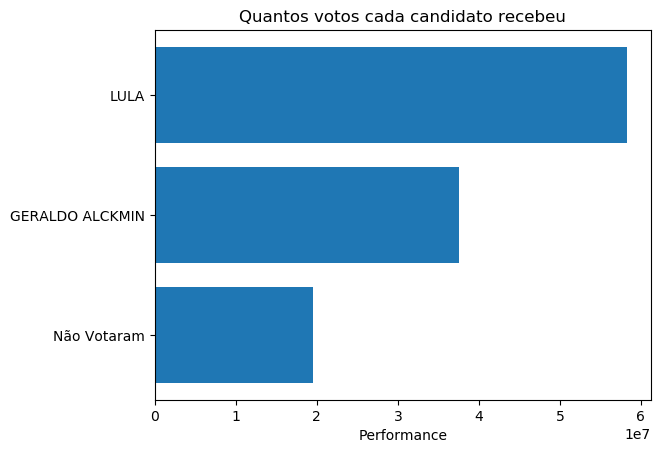

In [40]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

([<matplotlib.patches.Wedge at 0x230776dffc8>,
 [Text(-1.0998417464095183, -0.01865831865043827, 'LULA'),
  Text(1.0447519634757916, -0.5903332404781882, 'GERALDO ALCKMIN'),
  Text(0.6079694581277166, 1.0345883906094688, 'Não Votaram')],
 [Text(-0.5999136798597371, -0.010177264718420873, '50.5%'),
  Text(0.6094386453608784, -0.3443610569456098, '32.5%'),
  Text(0.3546488505745013, 0.6035098945221902, '16.9%')])

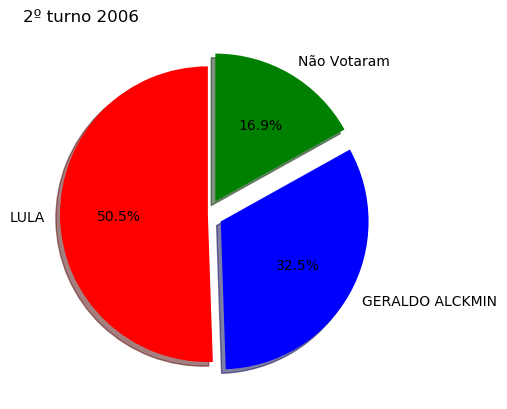

In [41]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1, 0.1)
colors = ('r','b','g')

plt.pyplot.title('2º turno 2006', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

In [42]:
votostotais1turno = votostotais1turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v1), 
                                              'Porcentagem' : 100-votostotais1turno.Porcentagem.sum() } , ignore_index=True)
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,LULA,46662365,40.454785
1,PSDB,GERALDO ALCKMIN,39968369,34.651304
2,PSOL,HELOÍSA HELENA,6575393,5.700656
3,PDT,CRISTOVAM BUARQUE,2538844,2.201097
4,PRP,ANA MARIA RANGEL,126404,0.109588
5,Outros,Outros,125358,0.108681
6,Não Votaram,Não Votaram,19347756,16.773889


# Salvar os Arquivos CSV

In [43]:
votostotais1turno['Ano'] = 2006
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PT,LULA,46662365,40.454785,2006
1,PSDB,GERALDO ALCKMIN,39968369,34.651304,2006
2,PSOL,HELOÍSA HELENA,6575393,5.700656,2006
3,PDT,CRISTOVAM BUARQUE,2538844,2.201097,2006
4,PRP,ANA MARIA RANGEL,126404,0.109588,2006
5,Outros,Outros,125358,0.108681,2006
6,Não Votaram,Não Votaram,19347756,16.773889,2006


In [44]:
votostotais1turno.to_csv('1turno_2006.csv')

In [45]:
votostotais2turno['Ano'] = 2006
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PT,LULA,58295042,50.539946,2006
1,PSDB,GERALDO ALCKMIN,37543178,32.548740,2006
2,Não Votaram,Não Votaram,19506269,16.911314,2006


In [46]:
votostotais2turno.to_csv('2turno_2006.csv')